In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import requests 
import time
import datetime as dt
from numpy import log
import statsmodels.api as sm
import statsmodels.tsa as tsa
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

from pandas.tools.plotting import autocorrelation_plot

# statistical modeling libraries
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs
from scipy.stats import boxcox
#from arch import arch_model


# remove warnings
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import accuracy_score
%matplotlib inline
plt.figure(figsize=(14, 12))

/Users/diogodil/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


<Figure size 1008x864 with 0 Axes>

<Figure size 1008x864 with 0 Axes>

In [2]:
df = pd.read_csv('goiania_out_shift.csv',index_col=0,parse_dates=True).sort_index()
df.dropna(inplace=True)

In [3]:
df.head()

,t-5,t-4,t-3,t-2,t-1,t+1
0,,,,,,
2013-06-01,1141.0,1122.0,1212.0,1265.0,1376.0,1436
2013-07-01,1122.0,1212.0,1265.0,1376.0,1436.0,1116
2013-08-01,1212.0,1265.0,1376.0,1436.0,1116.0,1150
2013-09-01,1265.0,1376.0,1436.0,1116.0,1150.0,1148
2013-10-01,1376.0,1436.0,1116.0,1150.0,1148.0,1062


In [33]:
X = df
size = int(len(X) * 0.85)
size
train, test = X['2013-01-01':'2016-12-02'], X['2017-01-01':'2017-12-01']
history = [x for x in train.astype(float)]
df.dropna(inplace=True)

In [34]:
features = df[['t-1','t-2','t-3']].values
target = df[['t+1']].values[:,np.newaxis,0]

In [35]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.33, random_state=42)
X_train = train[['t-3', 't-2', 't-1']].values
y_train = train[['t+1']].values
X_test = test[['t-3', 't-2', 't-1',]].values
y_test = test[['t+1']].values

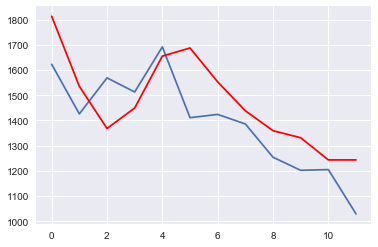

Test R2: 0.359
Test MSE: 22111.176
Test RMSE: 148.698


In [36]:
from sklearn import neighbors
knn = neighbors.KNeighborsRegressor(n_neighbors=3, weights='uniform')
# fitting the model
knn.fit(X_train, y_train.ravel())

# predict the response
pred = knn.predict(X_test)
plt.plot(y_test)
plt.plot(pred, color='red')
plt.show()

error = mean_squared_error(y_test, pred)
rms = sqrt(mean_squared_error(y_test, pred))
coefficient_of_dermination = r2_score(y_test, pred)
print('Test R2: %.3f' % coefficient_of_dermination)
print('Test MSE: %.3f' % error)
print('Test RMSE: %.3f' % rms)

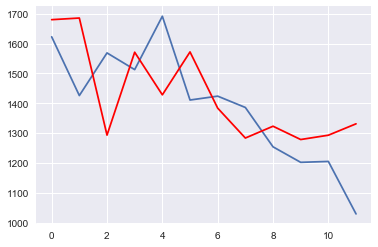

Test R2: 0.111
Test MSE: 30636.372
Test RMSE: 175.032


In [37]:
from sklearn import ensemble

rdf = ensemble.RandomForestRegressor()
# fitting the model
rdf.fit(X_train, y_train.ravel())

# predict the response
pred = rdf.predict(X_test)
plt.plot(y_test)
plt.plot(pred, color='red')
plt.show()

error = mean_squared_error(y_test, pred)
rms = sqrt(mean_squared_error(y_test, pred))
coefficient_of_dermination = r2_score(y_test, pred)
print('Test R2: %.3f' % coefficient_of_dermination)
print('Test MSE: %.3f' % error)
print('Test RMSE: %.3f' % rms)

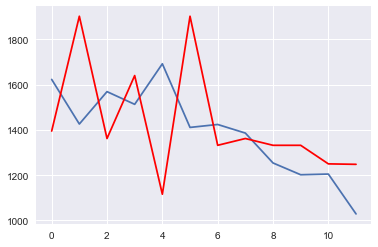

Test R2: -1.399
Test MSE: 82700.417
Test RMSE: 287.577


In [38]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(random_state=0)

# fitting the model
tree.fit(X_train, y_train.ravel())

# predict the response
pred = tree.predict(X_test)
plt.plot(y_test)
plt.plot(pred, color='red')
plt.show()

error = mean_squared_error(y_test, pred)
rms = sqrt(mean_squared_error(y_test, pred))
coefficient_of_dermination = r2_score(y_test, pred)
print('Test R2: %.3f' % coefficient_of_dermination)
print('Test MSE: %.3f' % error)
print('Test RMSE: %.3f' % rms)

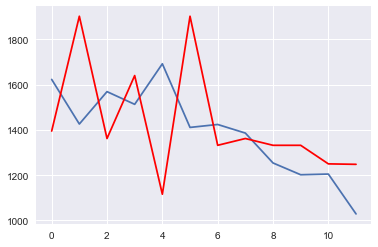

Test R2: -1.399
Test MSE: 82700.417
Test RMSE: 287.577


In [39]:
from sklearn import linear_model
regr = linear_model.LinearRegression()


# fitting the model
regr.fit(X_train, y_train.ravel())

# predict the response
pred = tree.predict(X_test)
plt.plot(y_test)
plt.plot(pred, color='red')
plt.show()

error = mean_squared_error(y_test, pred)
rms = sqrt(mean_squared_error(y_test, pred))
coefficient_of_dermination = r2_score(y_test, pred)
print('Test R2: %.3f' % coefficient_of_dermination)
print('Test MSE: %.3f' % error)
print('Test RMSE: %.3f' % rms)

In [32]:
from pandas import DataFrame
from pandas import concat
 
def series_to_supervised(data, n_in=1, n_out=1, dropnan=False):
	"""
	Frame a time series as a supervised learning dataset.
	Arguments:
		data: Sequence of observations as a list or NumPy array.
		n_in: Number of lag observations as input (X).
		n_out: Number of observations as output (y).
		dropnan: Boolean whether or not to drop rows with NaN values.
	Returns:
		Pandas DataFrame of series framed for supervised learning.
	"""
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg


In [13]:
df2 = pd.read_csv('goiania_out.csv',index_col=0,parse_dates=True).sort_index()

In [14]:
values = df2.values
data = series_to_supervised(values, 3, 3)
print(data)

    var1(t-3)  var1(t-2)  var1(t-1)  var1(t)  var1(t+1)  var1(t+2)
0         NaN        NaN        NaN     1141     1122.0     1212.0
1         NaN        NaN     1141.0     1122     1212.0     1265.0
2         NaN     1141.0     1122.0     1212     1265.0     1376.0
3      1141.0     1122.0     1212.0     1265     1376.0     1436.0
4      1122.0     1212.0     1265.0     1376     1436.0     1116.0
5      1212.0     1265.0     1376.0     1436     1116.0     1150.0
6      1265.0     1376.0     1436.0     1116     1150.0     1148.0
7      1376.0     1436.0     1116.0     1150     1148.0     1062.0
8      1436.0     1116.0     1150.0     1148     1062.0     1108.0
9      1116.0     1150.0     1148.0     1062     1108.0     1248.0
10     1150.0     1148.0     1062.0     1108     1248.0     1474.0
11     1148.0     1062.0     1108.0     1248     1474.0     1335.0
12     1062.0     1108.0     1248.0     1474     1335.0     1432.0
13     1108.0     1248.0     1474.0     1335     1432.0     16

In [15]:
df2.head()

,qtd
0,
2013-01-01,1141
2013-02-01,1122
2013-03-01,1212
2013-04-01,1265
2013-05-01,1376


In [25]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df2, model='additive',freq=12)
print(result.trend)
# print(result.seasonal)
# print(result.resid)
# print(result.observed)

                    qtd
0                      
2013-01-01          NaN
2013-02-01          NaN
2013-03-01          NaN
2013-04-01          NaN
2013-05-01          NaN
2013-06-01          NaN
2013-07-01  1212.541667
2013-08-01  1235.291667
2013-09-01  1253.333333
2013-10-01  1276.708333
2013-11-01  1303.125000
2013-12-01  1313.625000
2014-01-01  1322.166667
2014-02-01  1340.625000
2014-03-01  1359.833333
2014-04-01  1385.916667
2014-05-01  1406.583333
2014-06-01  1412.250000
2014-07-01  1406.416667
2014-08-01  1400.541667
2014-09-01  1407.041667
2014-10-01  1414.916667
2014-11-01  1426.041667
2014-12-01  1451.208333
2015-01-01  1484.750000
2015-02-01  1523.791667
2015-03-01  1568.625000
2015-04-01  1618.666667
2015-05-01  1669.166667
2015-06-01  1722.458333
2015-07-01  1779.791667
2015-08-01  1836.791667
2015-09-01  1882.166667
2015-10-01  1908.291667
2015-11-01  1911.666667
2015-12-01  1916.458333
2016-01-01  1931.291667
2016-02-01  1944.291667
2016-03-01  1948.083333
2016-04-01  1940

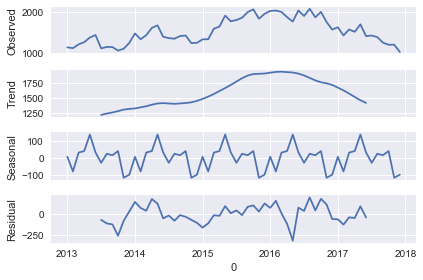

In [29]:
result = seasonal_decompose(df2, model='additive', freq=12)
result.plot()
plt.show()